# Mapper Algorithm on Sphere

## Production of Spherical Points

In [46]:
import numpy as np
np.random.seed(42)

n_points = 5000

points = np.zeros((n_points, 3))

np.random.seed(42)

for n in range(n_points):
    u = np.random.uniform()
    v = np.random.uniform()
    theta = 2 * np.pi * u
    phi = np.arccos(2*v - 1)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    points[n,:] = [x,y,z]

<IPython.core.display.Javascript object>


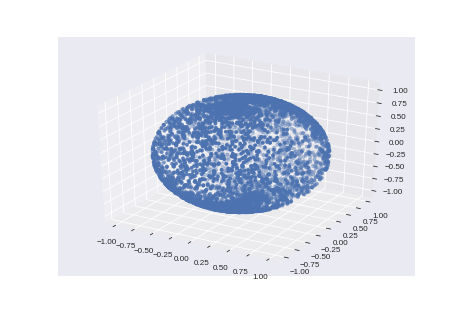

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:,0], points[:,1], points[:,2])
plt.show()

## Creation of Lens

$f(x,y,z) = (x,z)$

In [53]:
embedding = points[:,[0,2]]

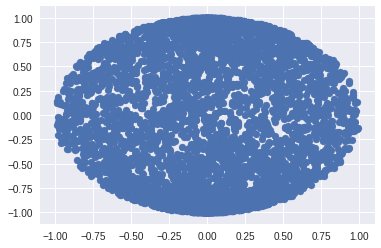

In [51]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(embedding[:,0], embedding[:,1])
plt.show()

In [52]:
import kmapper as km
from sklearn.cluster import DBSCAN

n_cubes = [10,10]
perc_overlap = 0.3
cover = km.cover.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap)


mapper = km.KeplerMapper(verbose=1)

clusterer = DBSCAN(metric='cosine', eps=0.3, min_samples=1, algorithm='brute')
kmapper_complex = mapper.map(lens=embedding, X=points,
                             clusterer=clusterer, cover=cover, precomputed=False)
_ = mapper.visualize(kmapper_complex, path_html='network.html')

KeplerMapper()
Mapping on data shaped (5000, 3) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 512 edges and 144 nodes in 0:00:00.358239.
Wrote visualization to: network.html
